# SPAM DETECTION PROJECT
#### Email Spam Detection is a classification problem in machine learning where the objective is to classify an email as spam or not spam.
#### Email spam detection is a crucial problem in modern communication. Spam emails are unsolicited messages sent in bulk to multiple recipients. The high volume of such emails can lead to a significant amount of time waste for the recipient.

To solve this problem, we have used the following approach:
1. Load the dataset: We have loaded the dataset of emails and labels indicating whether it is 
    spam or not.
2. Split the dataset into training and testing data: To train and evaluate the model, we have 
    split the 
    dataset into training and testing data.
3. Convert text to numerical data using TF-IDF: As machine learning models can only process numerical 
    data, we have used the TF-IDF vectorizer to convert text data into numerical data.
4. Next, we will use Synthetic Minority Over-sampling Technique (SMOTE) to address the problem of 
imbalanced data. In spam detection, 
the number of spam emails is often much larger than the number of legitimate emails. This imbalance 
can lead to a biased model that doesn't perform well on the minority 
class (legitimate emails). SMOTE creates synthetic samples of the minority class to balance the data.
5. After preprocessing the data, we will use chi-squared test for feature selection. 
The chi-squared test is a statistical test that measures the independence of two categorical 
variables. We will use this test to select the most important features for our model.
6. Finally, we will train a logistic regression model on the preprocessed data. Logistic regression 
is a type of supervised machine learning algorithm that can be used for binary classification 
problems. After training the model, we will test it on the test set and evaluate its performance 
using metrics such as accuracy, precision, recall, and F1 score.

### _Import Libraries_

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

import tkinter as tk
from tkinter import ttk

import warnings
warnings.filterwarnings("ignore")

##### _Loading the data from csv file to pandas Dataframe_

In [2]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\mail_data.csv')

In [3]:
df.sample(5)

,Category,Message
1975,ham,Thats cool. Where should i cum? On you or in y...
1035,ham,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...
1872,ham,Dont know supports ass and srt i thnk. I think...
3703,ham,Hey loverboy! I love you !! I had to tell ... ...
4691,ham,Ok no prob


##### _Data Processing_

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
# replace null values with a null string

df = df.where((pd.notnull(df)),'')

ham     4825
spam     747
Name: Category, dtype: int64


<AxesSubplot:xlabel='Category', ylabel='count'>

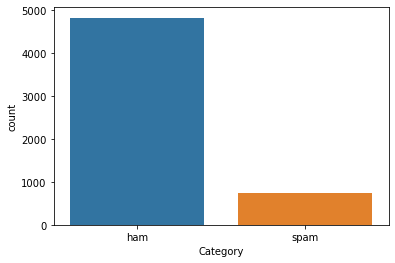

In [7]:
print(df['Category'].value_counts())
sns.countplot(df['Category'])

In [8]:
# checking the number of rows and columns in the dataframe
df.shape 

(5572, 2)

In [9]:
# checking the number of duplicate values in data

df.duplicated().sum()

415

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
# Label ham mail as 0; spam mail as 1;
le = LabelEncoder()

In [13]:
df['Category'] = le.fit_transform(df['Category'])

0    4516
1     641
Name: Category, dtype: int64


<AxesSubplot:xlabel='Category', ylabel='count'>

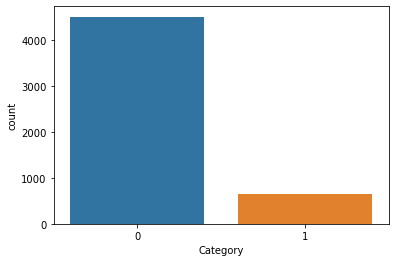

In [14]:
print(df['Category'].value_counts())
sns.countplot(df['Category'])

Here clearly we have Imbalanced data.
This can lead to problems in machine learning as the model may not perform well on the minority class. It can also result in biased models that favor the majority class.

In [15]:
# Separating the data as Message and Category
x = df['Message']
y = df['Category']

##### _Splitting the data into training data & test data_

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [17]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5157,)
(4125,)
(1032,)


##### _Feature Extraction_

In [18]:
# transform the text data to feature vectors that can be used as input to the models.

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

Tf-idf is used to convert text into numerical features, which allows the model to better understand and differentiate between the words in emails and determine if they are spam or not.

##### _Handling Imbalanced Data_

In [19]:
sm = SMOTE(sampling_strategy='auto',random_state=None,k_neighbors=3)

x_res, y_res = sm.fit_resample(x_train_features, y_train)

SMOTE is used in this dataset to balance the class distribution of the training data. The dataset is imbalanced, meaning that the number of non-spam emails is much higher than the number of spam emails. This can result in a biased model that is more likely to predict non-spam emails. SMOTE generates synthetic samples of the minority class (spam emails) to balance the class distribution and prevent this bias.

##### _Feature Selection_

In [20]:
selector = SelectKBest(chi2, k='all')
x_train_res = selector.fit_transform(x_res, y_res)
x_test_res = selector.transform(x_test_features)

Chi2 is used in this dataset for feature selection. It measures the dependence between each feature and the target variable. The higher the chi2 score, the more important the feature is for the classification. By selecting the top K best features, we can reduce the dimensionality of the data and improve the performance of the model. This is particularly important for sparse datasets like this one where many features may not contribute much to the prediction.

In [21]:
print(x_train_features)

  (0, 6692)	0.48303813512243965
  (0, 6605)	0.4898673616987752
  (0, 1247)	0.5538832733861689
  (0, 2400)	0.4689535663823655
  (1, 1592)	0.5594126567616489
  (1, 5859)	0.5964494866231046
  (1, 6492)	0.5755914257195885
  (2, 300)	0.16113294658934302
  (2, 820)	0.24488128414489752
  (2, 6835)	0.24488128414489752
  (2, 5064)	0.22967525805125708
  (2, 7355)	0.21568440262445418
  (2, 682)	0.22967525805125708
  (2, 25)	0.24488128414489752
  (2, 2564)	0.19505111090227498
  (2, 798)	0.24488128414489752
  (2, 4393)	0.24488128414489752
  (2, 4520)	0.24488128414489752
  (2, 4519)	0.24488128414489752
  (2, 4084)	0.2644704778405301
  (2, 6828)	0.13848562282513652
  (2, 3252)	0.18176623831152225
  (2, 3695)	0.21568440262445418
  (2, 4522)	0.2363176943466334
  (2, 4089)	0.2196593047164816
  :	:
  (4120, 1223)	0.5846719438819551
  (4120, 6456)	0.4751891362657192
  (4120, 3181)	0.4285103741434733
  (4120, 3921)	0.39220487670240334
  (4120, 2101)	0.30807173962343376
  (4121, 5968)	0.4786671802830861
  (

### _Training the Models_

In [22]:
# Creating a dictionary for updating model results
results = {}

##### _a. Logistic Regression_

In [23]:
model_LR = LogisticRegression(max_iter=100, penalty='l2')
model_LR.fit(x_train_res, y_res)

# prediction
y_pred_LR = model_LR.predict(x_test_res)

# Evaluation of Model
accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR)
recall_LR = recall_score(y_test, y_pred_LR)
f1_LR = f1_score(y_test, y_pred_LR)

results["Logistic Regression"] = {"accuracy": accuracy_LR, 
                                  "precision": precision_LR, 
                                  "recall": recall_LR, 
                                  "f1_score": f1_LR
                                 }

Logistic regression is used in this dataset because it is a simple and effective method for binary classification problems, such as spam detection. Logistic regression models the relationship between the independent variables and the probability of the target variable being either 0 or 1. The model outputs a probability score, which can be thresholded to produce binary predictions. Logistic regression is also well-suited to high dimensional datasets, which is why we have used it here after feature selection with chi2.

#####  _b. Support Vector Machine_

In [24]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(x_train_res, y_res)

# prediction
y_pred_SVM = model_SVM.predict(x_test_features)

# Evaluation of Model

accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
precision_SVM = precision_score(y_test, y_pred_SVM)
recall_SVM = recall_score(y_test, y_pred_SVM)
f1_SVM = f1_score(y_test, y_pred_SVM)

results["SVM"] = {"accuracy": accuracy_SVM, 
                  "precision": precision_SVM, 
                  "recall": recall_SVM, 
                  "f1_score": f1_SVM
                  }

Support Vector Machine (SVM) is used in this dataset for classification. SVM is a powerful algorithm for both linear and non-linear classification problems. It tries to find a hyperplane that maximally separates the classes and is robust to outliers. SVM is particularly useful for datasets with high-dimensional features like this one. By using a linear kernel, we can achieve good performance while avoiding overfitting and improving interpretability.

##### _c. Multinomial Naive Bayes_

In [25]:
model_MNB = MultinomialNB()
model_MNB.fit(x_train_res, y_res)

# prediction
y_pred_MNB = model_MNB.predict(x_test_features)

# Evaluation of Model

accuracy_MNB = accuracy_score(y_test, y_pred_MNB)
precision_MNB = precision_score(y_test, y_pred_MNB)
recall_MNB = recall_score(y_test, y_pred_MNB)
f1_MNB = f1_score(y_test, y_pred_MNB)

results["Multinomial Naive Bayes"] = {"accuracy": accuracy_MNB, 
                          "precision": precision_MNB, 
                          "recall": recall_MNB, 
                          "f1_score": f1_MNB
                         }

Multinomial naive bayes is used in this dataset because it is a fast and simple algorithm for text classification. It is based on Bayes theorem and assumes that the features are independent and follows a multinomial distribution. This algorithm works well with sparse data, such as text data, and has been widely used in spam filtering tasks. By combining it with the preprocessing steps of train_test_split, tfidf, smote, and chi2, we can achieve a high accuracy in detecting spam emails.

###### Results of all Model

In [26]:
df_results = pd.DataFrame.from_dict(results, orient='index')

df_results

,accuracy,precision,recall,f1_score
Logistic Regression,0.982558,0.976378,0.892086,0.932331
SVM,0.981589,0.961538,0.899281,0.929368
Multinomial Naive Bayes,0.965116,0.823899,0.942446,0.879195


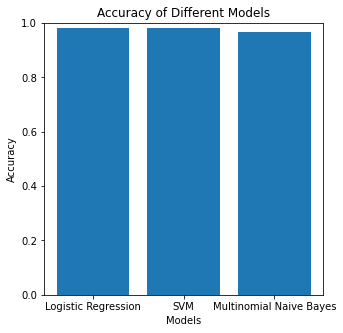

In [27]:
plt.figure(figsize=(5,5))
plt.bar(results.keys(), [result["accuracy"] for result in results.values()])
plt.title("Accuracy of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

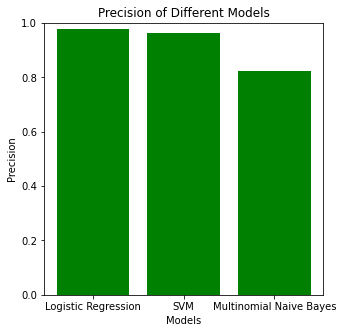

In [28]:
plt.figure(figsize=(5,5))
plt.bar(results.keys(), [result["precision"] for result in results.values()], color='g')
plt.title("Precision of Different Models")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.show()

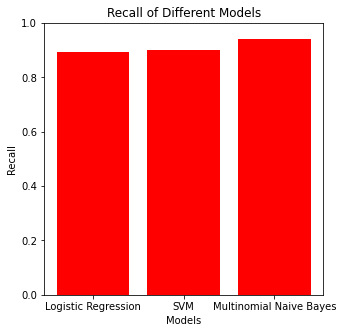

In [29]:
plt.figure(figsize=(5,5))
plt.bar(results.keys(), [result["recall"] for result in results.values()], color='r')
plt.title("Recall of Different Models")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.show()

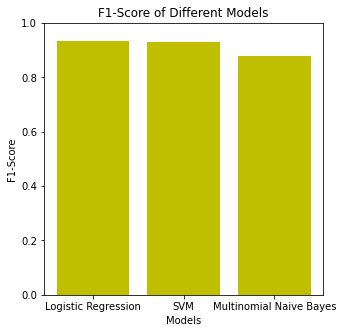

In [30]:
plt.figure(figsize=(5,5))
plt.bar(results.keys(), [result["f1_score"] for result in results.values()], color='y')
plt.title("F1-Score of Different Models")
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.show()



##### AUC, ROC Curve

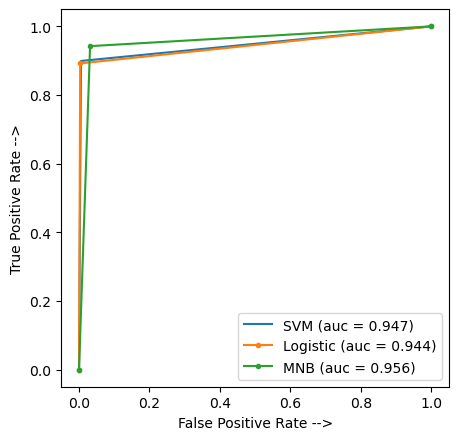

In [31]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_LR)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_SVM)
auc_svm = auc(svm_fpr, svm_tpr)

mnb_fpr, mnb_tpr, threshold = roc_curve(y_test, y_pred_MNB)
auc_mnb = auc(mnb_fpr, mnb_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(mnb_fpr, mnb_tpr, marker='.', label='MNB (auc = %0.3f)' % auc_mnb)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

##### Best Model: Support Vector Machine (SVM)
It is clear from the Classification Report that SVM is better performing model other than Logistic Regression and Multinomial Naive Bayes.
As Multinomial Naive Bayes has high Recall then SVM, and SVM is better in precision than Multinomial Naive Bayes, for that clearing of confusion between them we check th f1 score, for which SVM performs well with High Accuracy Score.

##### Prediction on Sample Input Email

In [32]:
input_mail = ["Congratulations! You have won a prize. Click here to claim it."]

input_data_features = feature_extraction.transform(input_mail)

final_input = selector.transform(input_data_features)

prediction = model_LR.predict(final_input)
print(prediction)

if (prediction[0]==0):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Spam mail


In [33]:
input_mail = ["Fine if thatåÕs the way u feel. ThatåÕs the way its gota b"]

input_data_features = feature_extraction.transform(input_mail)

final_input = selector.transform(input_data_features)

prediction = model_LR.predict(final_input)
print(prediction)

if (prediction[0]==0):
  print('Ham mail')
else:
  print('Spam mail')

[0]
Ham mail


##### Creating a Frontend for Spam Prediction

In [34]:
# Function to predict the label of a message
def predict_spam(email):
    email_tfidf = feature_extraction.transform([email])
    email_f = selector.transform(email_tfidf)
    prediction = model_SVM.predict(email_f)
    if (prediction[0]==0):
        return "Ham mail"
    else:
        return "Spam mail"

# Tkinter frontend
root = tk.Tk()
root.title("Spam Detection")
root.geometry("600x300")

# Labels
title = tk.Label(root, text="Enter a email to predict if it's spam or ham")
title.pack(pady=20)

# Text entry
email = tk.StringVar()
email_entry = tk.Entry(root, textvariable=email, width=75)
email_entry.pack(pady=20)

# Button
def submit():
    result = predict_spam(email.get())
    result_label.config(text=result)

submit_button = tk.Button(root, text="Predict", command=submit)
submit_button.pack(pady=20)

# Result label
result_label = tk.Label(root, text="")
result_label.pack(pady=20)

root.mainloop()